#  Expanding on NumPy

NumPy is the fundamental package for scientific computing with Python. It contains among other things:
- a powerful N-dimensional array object
- fast, parallelized math functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

NumPy is the basis for the scientific computing and data science stacks in Python, including SciPy and Pandas.

![NumPy and SciPy](numpy-and-scipy.png)

Website: [http://numpy.org](http://numpy.org/)
Github repository: [https://github.com/numpy/numpy](https://github.com/numpy/numpy)

NumPy 1.0 was released in October 2006. The latest release, 1.12.1, was released March 18, 2017.


## Why not just use regular Python?

After all, Python can do math with integers and floating point numbers, has a built in math and array packages, and fast and flexible container types:

- Lists: cheap insert and append methods, can hold any type of data
- Dictionaries: Mapping type with very fast lookup operations

However, NumPy has an *extremely* efficient n-dimensional array implementation, and it has parallelized versions of the main Python math operations which can operate very quickly and efficiently on those arrays. This makes it very well suited to the kinds of vector and matrix operations that the SciPy stack builds on.

Most of the time you won't be using NumPy directly but it is still good to understand how its core pieces work.

## The basic type: `ndarray`

The n-dimensional array (`ndarray`) is the fundamental data structure in NumPy. It is a table of elements, all of the same type, which can be indexed (that is, accessed) by a tuple of integers.


In [239]:
import numpy as np

# Each element must be of the same type.
intarray = np.array([1, 2, 3, 4])
intarray.dtype

dtype('int64')

In [240]:
floatarray = np.array([1.0, 2.0, 3.0, 4.0])
floatarray.dtype

dtype('float64')

In [241]:
# Numpy will try to coerce elements to the same datatype:
mixedarray = np.array([1, 2.0, 3, np.pi])
mixedarray.dtype

dtype('float64')

In [242]:
# If you force it to coerce too much you end up with "object" as a dtype, which is not useful. Stick to numbers.
dont_do_this = np.array([1, False, "a string", object()])
dont_do_this.dtype

dtype('O')

In [243]:
# You can specify the dtype when creating the ndarray, otherwise it will be inferred, defaulting to float64
floats = np.array([0, 1, 2], dtype="float64")
floats.dtype

dtype('float64')

## Arrays have shapes and sizes

The "nd" in `ndarray` means arrays can have any number of *dimensions*. An array has the following properties:
- `ndim`: the number of axes. Also known as the *rank* of the array.
- `shape`: the dimensions of the array. A tuple of integers indicating the size of the array in each dimension.
- `size`: the number of elements in the array.


In [244]:
def describe_array(name, a):
    print(name)
    print(a)
    print("Array ndim: ", a.ndim)
    print("Array shape: ", a.shape)
    print("Array size: ", a.size)
    print()


describe_array("1 row, 3 columns", np.array([1, 2, 3]))
describe_array("2 rows, 3 columns", np.array([[1, 2, 3], [4, 5, 6]]))
describe_array("3 rows, 2 columns", np.array([[1, 2], [3, 4], [5, 6]]))
describe_array("2 faces, 3 rows, 1 column", np.array([[[1], [2], [3]], [[4], [5], [6]]]))

1 row, 3 columns
[1 2 3]
Array ndim:  1
Array shape:  (3,)
Array size:  3

2 rows, 3 columns
[[1 2 3]
 [4 5 6]]
Array ndim:  2
Array shape:  (2, 3)
Array size:  6

3 rows, 2 columns
[[1 2]
 [3 4]
 [5 6]]
Array ndim:  2
Array shape:  (3, 2)
Array size:  6

2 faces, 3 rows, 1 column
[[[1]
  [2]
  [3]]

 [[4]
  [5]
  [6]]]
Array ndim:  3
Array shape:  (2, 3, 1)
Array size:  6



In [245]:
# arrays can be reshaped after they are created:
a = np.array([1, 2, 3, 4, 5, 6])
a

array([1, 2, 3, 4, 5, 6])

In [246]:
# two rows, 3 columns
a.reshape(2, 3)

array([[1, 2, 3],
       [4, 5, 6]])

## Creating Arrays

There are several convenience functions for creating arrays.

- `np.arange`: Create an array from a range of numbers
- `np.zeros`: An array filled with zeroes
- `np.ones`: An array filled with ones
- `np.eye`: An identity matrix
- `np.random.*`: Arrays filled with random values from various distributions


In [247]:
# np.arange([start,], stop[, step])
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [248]:
np.arange(100, 90, -1)

array([100,  99,  98,  97,  96,  95,  94,  93,  92,  91])

In [249]:
# np.zeros(shape) where `shape` is a tuple.
# e.g. 1 row, 3 columns
np.zeros((1, 3))

array([[ 0.,  0.,  0.]])

In [250]:
# or 2 faces, 5 rows, 2 columns
np.zeros((2, 5, 2))

array([[[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]],

       [[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]]])

In [251]:
# np.eye(rows, columns=None, k=0)
np.eye(4)

array([[ 1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.]])

In [252]:
# np.random.randint(low, high, shape)
np.random.randint(0, 10, (3, 3))

array([[0, 8, 3],
       [3, 7, 2],
       [2, 2, 8]])

In [253]:
# np.random.normal(mean, stdev, shape)
np.random.normal(0, 1, (4, 4))

array([[-1.272097, -0.140478,  0.548877,  2.041667],
       [-2.173078,  0.783654, -0.839124,  0.280913],
       [ 1.357508, -0.690965, -0.24632 ,  0.144069],
       [ 1.453931,  0.31755 , -0.21052 , -0.384957]])

## Simple Arithmetic Operations on Arrays

Buit-in python arithmetic operations work element-wise on arrays, like you would expect.

NumPy also includes its own versions of many math operations as what it calls `ufunc`s, or universal functions. These offer high-speed, parallelized versions of basic operations.


In [254]:
a = np.arange(0, 10)
print(a)

[0 1 2 3 4 5 6 7 8 9]


In [255]:
a + 10

array([10, 11, 12, 13, 14, 15, 16, 17, 18, 19])

In [256]:
a * 2

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

### List vs. Array Performance

It's easy to prove that for numeric operations, NumPy arrays vastly outperform lists.

In [257]:
# Let's create a python list and an array, each with 10 million integers.
big_list = list(range(10000000))
big_array = np.arange(10000000)

In [258]:
# See how long it takes to get a new list containing the square of each element from big_list
%timeit big_list_squared = [i * i for i in big_list]

1 loop, best of 3: 705 ms per loop


In [259]:
# See how long it takes to get a new array containing the square of each element from big_array
%timeit big_array_squared = big_array * big_array

10 loops, best of 3: 28.9 ms per loop


In [260]:
import math
%timeit big_list_sines = [math.sin(i) for i in big_list]

1 loop, best of 3: 1.72 s per loop


In [261]:
# numpy ufuncs provide vectorized operations that go beyond simple arithmetic.
# np.sin() calculates the sine of each element in the passed-in array.
%timeit big_array_sines = np.sin(big_array)

1 loop, best of 3: 237 ms per loop


In [262]:
# And not only is the list slower, it also uses a more memory. Below is its size in mbytes.
import sys
sys.getsizeof(big_list) / 1024 / 1024

85.83079528808594

In [263]:
# vs. the size of the array in mbytes
sys.getsizeof(big_array) / 1024 / 1024

76.29403686523438

In [264]:
# Note there is a special function for the dot product, do not use the built-in '*' operator
a1 = np.arange(0, 9).reshape(3,3)
a2 = np.arange(10, 19).reshape(3,3)
print("a1:", repr(a1))
print()
print("a2:", repr(a2))


a1: array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

a2: array([[10, 11, 12],
       [13, 14, 15],
       [16, 17, 18]])


In [265]:
# the * operator performs element-wise multiplication
a1 * a2

array([[  0,  11,  24],
       [ 39,  56,  75],
       [ 96, 119, 144]])

In [266]:
# to get the dot product of a matrix and a vector:
a1.dot(a2[0])

array([ 35, 134, 233])

In [267]:
# or the dot product of two matrices:
a1.dot(a2)

array([[ 45,  48,  51],
       [162, 174, 186],
       [279, 300, 321]])

In [268]:
np.matmul(a1, a2)

array([[ 45,  48,  51],
       [162, 174, 186],
       [279, 300, 321]])

## Matrices

NumPy actually does provide a special `ndarray` subclass called `matrix`. It is essentially a two-dimensional array with a few extra utility functions and custom operators.

Notably, applying the built-in `*` operator to matrix objects results in the dot product.

In [269]:
m1 = np.matrix(a1)
m2 = np.matrix(a2)

In [270]:
m1 * m2

matrix([[ 45,  48,  51],
        [162, 174, 186],
        [279, 300, 321]])

## Accessing Array Elements and Slicing

Arrays can be sliced like so:
    
    array[lower:upper:step]

The `upper` bound is never included in the result.

In [271]:
a = np.array([10, 11, 12, 13, 14])
a[1:3]

array([11, 12])

In [272]:
# slicing a multidimensional array:
a = np.arange(9).reshape(3, 3)
a

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [273]:
# to get a scalar element value, specify its location in all dimensions (here, just row and column):
a[1, 1]

4

In [274]:
# retrieve an entire row by index:
a[0]

array([0, 1, 2])

In [275]:
# retrieve an entire column by index (note the slice syntax to get all rows,
# then the index to specify which column to extract from each row)
a[:, 0]

array([0, 3, 6])

In [276]:
# to select a sub-matrix, use slice syntax to specify row and column locations.
# here, we get the bottom-left corner of the matrix:
# (all rows starting with the second row, and all columns but the last one)
a[1:, :2]

array([[3, 4],
       [6, 7]])

#### Array slices are "views", not copies

That is, when you assign an array slice to a variable, and then change the data in the original array, the data in the variable (that is, the slice) changes as well.

In [277]:
# Get a slice of `a`, in this case the entire first row.
a = np.arange(10)
b = a[:]
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [278]:
# Now let's change the last element from 9 to 90
a[-1] = 90

In [279]:
# and we see that the value changes in the view as well.
b

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 90])

In [280]:
# to get a copy of an array, use the `copy` method:
a = np.arange(10)
b = a.copy()
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [281]:
# because we used `copy` to create array `b`, changing a value in `a` will not affect `b`:
a[-1] = 90
b

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

#### "Fancy Indexing"

You can use boolean comparisons to select just the elements you want from an array.

In [282]:
# boolean comparisons to arrays produce a "mask" array: an array of the same shape filled with boolean values
# indicating whether the item at that position in the original array meets the boolean condition.
a = np.random.randint(0, 10, (20))
print(a)
print(a > 5)

[7 8 4 2 0 8 6 7 9 5 8 5 1 4 1 3 8 1 0 3]
[ True  True False False False  True  True  True  True False  True False
 False False False False  True False False False]


In [283]:
# We can now use that "mask" array to select elements from an array with the same shape.
# for example, below will give us a new array with only the elements in `a` greater than 5.
# NB: in this case we get a copy of the original data, not a view like we would if we had sliced the array.
a[a > 5]

array([7, 8, 8, 6, 7, 9, 8, 8])

In [284]:
# It's possible to chain multiple boolean tests together with the & and | operators
# (although the conditions must be in parentheses)
a[(a <= 2) | (a >= 8)]

array([8, 2, 0, 8, 9, 8, 1, 1, 8, 1, 0])

## Conditional Login in Array Operations

In [23]:
# The np.where function is a vectorized version of the expression x if 
# condition else y

In [41]:
arr=np.random.randn(4,4)
np.where(arr > 0, 1, -1) # replace all positive with 1 all negative with -1

array([[ 1,  1,  1, -1],
       [-1, -1,  1,  1],
       [ 1,  1,  1, -1],
       [ 1, -1,  1,  1]])

In [42]:
print(arr)
np.where(arr > 0 , 1, arr) # replace all positive with 1

[[ 0.96156545  0.14822698  0.69157911 -0.74246894]
 [-0.8202007  -0.62143741  0.40353298  0.05926853]
 [ 0.28920817  1.75828196  0.90082401 -0.13860424]
 [ 0.03234854 -0.62340211  0.74100624  0.86711971]]


array([[ 1.        ,  1.        ,  1.        , -0.74246894],
       [-0.8202007 , -0.62143741,  1.        ,  1.        ],
       [ 1.        ,  1.        ,  1.        , -0.13860424],
       [ 1.        , -0.62340211,  1.        ,  1.        ]])

## Random Walk 


In [77]:
# 1-D random walk problem starting from 0 with steps 1 and -1 occuring
# with equal probability

In [76]:
import numpy as np
import random
nsteps=10000
draws =np.random.randint(0,2,size=nsteps)
draws[0]=0
#print(draws
steps=np.where(draws >0, 1, -1)
#print(np.shape(steps))
walk=np.cumsum(steps)
(np.abs(walk) >= 10 ).argmax()

(10000,)


81

## Transposition

`ndarray` objects provide easy access to their transposed axes. That is, we can turn rows into columns and vice-versa.

In [34]:
a = np.arange(18).reshape((2,3,3))
a

array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]]])

In [35]:
# the `T` property of an ndarray provides easy access to the transpositions of all axes:
a.T

array([[[ 0,  9],
        [ 3, 12],
        [ 6, 15]],

       [[ 1, 10],
        [ 4, 13],
        [ 7, 16]],

       [[ 2, 11],
        [ 5, 14],
        [ 8, 17]]])

In [36]:
# the `transpose` method lets us transpose axes in a particular order:
a.transpose((0, 2, 1))

array([[[ 0,  3,  6],
        [ 1,  4,  7],
        [ 2,  5,  8]],

       [[ 9, 12, 15],
        [10, 13, 16],
        [11, 14, 17]]])

### Vector Stacking and Combining.

Combining arrays can be done multiple ways.

"Stacking" means keeping the original arrays intact as new rows or columns on a new dimension.

"Concatenating" means combining into a new array with the same dimensionality as the original arrays.

In [288]:
a1 = np.arange(3)
a2 = np.arange(3, 6)

In [289]:
# stack "column-wise". This can also be done via the deprecated `np.hstack` function.
np.stack([a1, a2])

array([[0, 1, 2],
       [3, 4, 5]])

In [290]:
# stack "row-wise", as the `np.vstack` function.
np.stack([a1, a2], axis=1)

array([[0, 3],
       [1, 4],
       [2, 5]])

In [291]:
np.concatenate([a1, a2])

array([0, 1, 2, 3, 4, 5])



### Loading (and saving) Data

There are several built-in functions in NumPy to load data.

- `fromfile`: fast and efficient loading of binary data (or simple text files)
- `ndarray.tofile`: save the contents of an array to a data file (NOT PORTABLE!)
- `save`: save an array in a portable format
- `load`: load data from the portable `save` format
- `loadtxt`: more flexible way of loading data from a text file
- `savetxt`: save data to a text file, with custom formatting
- `genfromtxt`: very flexible data loading, can handle missing/empty data


In [292]:
with open('data.csv') as f:
    for row in f:
        print(row)

Month,Delta,Abs(Delta)

1,70.77,70.77

2,78.64,78.64

3,71.78,71.78

4,69.57,69.57

5,61.48,61.48

6,22.23,23.3

7,-40.74,40.74

8,-89.19,89.19

9,-106.9,106.9

10,-95.84,95.84

11,-52.83,52.83

12,16.65,22.26



In [293]:
data = np.loadtxt("data.csv", skiprows=1, delimiter=",")

In [294]:
data

array([[   1.  ,   70.77,   70.77],
       [   2.  ,   78.64,   78.64],
       [   3.  ,   71.78,   71.78],
       [   4.  ,   69.57,   69.57],
       [   5.  ,   61.48,   61.48],
       [   6.  ,   22.23,   23.3 ],
       [   7.  ,  -40.74,   40.74],
       [   8.  ,  -89.19,   89.19],
       [   9.  , -106.9 ,  106.9 ],
       [  10.  ,  -95.84,   95.84],
       [  11.  ,  -52.83,   52.83],
       [  12.  ,   16.65,   22.26]])

In [295]:
data.dtype

dtype('float64')

In [296]:
# By default, genfromtxt gives the same (two-dimensional) output.
np.genfromtxt("data.csv", skip_header=1, delimiter=",")

array([[   1.  ,   70.77,   70.77],
       [   2.  ,   78.64,   78.64],
       [   3.  ,   71.78,   71.78],
       [   4.  ,   69.57,   69.57],
       [   5.  ,   61.48,   61.48],
       [   6.  ,   22.23,   23.3 ],
       [   7.  ,  -40.74,   40.74],
       [   8.  ,  -89.19,   89.19],
       [   9.  , -106.9 ,  106.9 ],
       [  10.  ,  -95.84,   95.84],
       [  11.  ,  -52.83,   52.83],
       [  12.  ,   16.65,   22.26]])

In [297]:
# But if we specify `dtype=None` as an argument, it returns a one-dimensional array of "structured" arrays,
# where the data type for each element is determined automatically.
arr = np.genfromtxt("data.csv", dtype=None, skip_header=1, delimiter=",")
arr

array([(1, 70.77, 70.77), (2, 78.64, 78.64), (3, 71.78, 71.78),
       (4, 69.57, 69.57), (5, 61.48, 61.48), (6, 22.23, 23.3),
       (7, -40.74, 40.74), (8, -89.19, 89.19), (9, -106.9, 106.9),
       (10, -95.84, 95.84), (11, -52.83, 52.83), (12, 16.65, 22.26)], 
      dtype=[('f0', '<i8'), ('f1', '<f8'), ('f2', '<f8')])

## Working with polynomials 

Assume a polynomial in the form: $y = 3*x^{2} + 2*x - 1$
We will query attributes of the polynomial, randomize the curve and fit a profile to it using the polyfit routine

Show the constant
-1
Print the roots of the polynomial
[-1.          0.33333333]
Print the order of the polynomial
2
Create X-values
x values =  [ 0.          0.05263158  0.10526316  0.15789474  0.21052632  0.26315789
  0.31578947  0.36842105  0.42105263  0.47368421  0.52631579  0.57894737
  0.63157895  0.68421053  0.73684211  0.78947368  0.84210526  0.89473684
  0.94736842  1.        ]
Create random y values about the curve
y values =  [ 1.17371026  1.19748934  1.04941971  1.08829804  1.16300145  1.1678665
  0.96466059  1.09972796  0.9669264   1.07565303  1.02453074  1.07975773
  1.06737546  1.06610843  0.75416205  0.97460176  0.8672064   0.82852806
  0.67486389  0.71944014]
Fit the data using polyfit and constuct a polynomial from the fit
plot the data and the fit


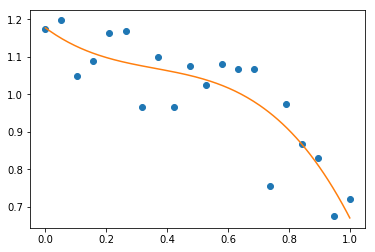

In [21]:
import numpy as np
import matplotlib.pyplot as plt
p = np.poly1d([3, 2, -1])
print('Show the constant')
print(p(0))
print('Print the roots of the polynomial')
print(p.roots)
print('Print the order of the polynomial')
print(p.order)
print('Create X-values')
x = np.linspace(0, 1, 20)
print('x values = ',x)
print('Create random y values about the curve')
y = np.cos(x) + 0.3*np.random.rand(20)
print('y values = ',y)
print('Fit the data using polyfit and constuct a polynomial from the fit')
p = np.poly1d(np.polyfit(x, y, 3))
t = np.linspace(0, 1, 200)
print('plot the data and the fit')
plt.plot(x, y, 'o', t, p(t), '-')
plt.show()

## Calculating Norms of Arrays

The norms of mxn matrices are useful in matrix algebra. Typical applications include calculating the matrix trace or are part of SVD (single value decomposition) algorithms for matrix factorizations. A matrix factorization of a square matrix in the form $A =UDV^{T}$ can be used to calculate the inverse $A^{-1}=VD^{-1}U^{T}$.


In [299]:
import numpy as np
A=np.array([[1,2],[3,4]])
print(A)
result_one=np.linalg.norm(A)
result_two=np.linalg.norm(A,'fro') # frobenius norm
result_three=np.linalg.norm(A,1) # L1 norm (max column sum)
result_four=np.linalg.norm(A,-1)
result_five=np.linalg.norm(A,np.inf) # L inf norm (max row sum)

print("Norm of the array",result_one)
print("Frobenius Norm is the default ||A||=[\sum_{i}{j} abs(a_{ij})^2]^[1/2]=",result_two)
print("max(sum(abs(x), axis=0))=", result_three)
print("min(sum(abs(x), axis=0))=",result_four)
print("max(abs(x))=",result_five)

[[1 2]
 [3 4]]
Norm of the array 5.47722557505
Frobenius Norm is the default ||A||=[\sum_{i}{j} abs(a_{ij})^2]^[1/2]= 5.47722557505
max(sum(abs(x), axis=0))= 6.0
min(sum(abs(x), axis=0))= 4.0
max(abs(x))= 7.0


## Calculating the determinant 

Calculating the determinant of the matrix. If $M_{ij}$ is the determinant of a square matrix left by removing the $i^{th}$ row and $j^{th}$ column from array A then for any row i: $det(A)=\sum_{j}(-1)^{i+j}a_{ij}M_{ij}$

In [300]:
import numpy as np
A = np.array([[1,2,3],[3,4,6],[7,8,9]])
print(A)
determ=np.linalg.det(A)
print(determ)

[[1 2 3]
 [3 4 6]
 [7 8 9]]
6.0


## Solving a linear system of equations
Solving a linear system of equations has a wide range of applications and can be used in obtaining solutions for sets of ordinary ordinary differential equations. An algebraic representation of the problem is: 
A * X = b, where A is square array containing the constant factors, X is a vector of indeterminate values and b are the constrains.

In [315]:
import numpy as np
#Solve the linear system 3x1+x2+2x3=9 x1+2x2+x3=8 2x2-1x3=2
A = np.array([[3,1,2], [1,2,1],[0,2,-1]])
b = np.array([9,8,2])
x = np.linalg.solve(A, b)
print(x)
np.allclose(np.dot(A, x), b)

#Returns True if two arrays are element-wise equal within a tolerance.


[ 0.285714  2.428571  2.857143]


True

## Array Transformations 
We will define a complex array and perform some common transformations to it

In [318]:
import numpy as np

#using the mat functions
#make an array from for a list of lists

A = np.mat([[3, 1, 4+0.1j], [1, 5-2j, 9], [2, 6+2j, 5]])
print('Complex Array A')
print(A)

print(type(A), A.dtype, A.shape)


Complex Array A
[[ 3.+0.j   1.+0.j   4.+0.1j]
 [ 1.+0.j   5.-2.j   9.+0.j ]
 [ 2.+0.j   6.+2.j   5.+0.j ]]
<class 'numpy.matrixlib.defmatrix.matrix'> complex128 (3, 3)


## Common transformations for MATRIX class objects
.T     transpose

.H     Hermitian transpose (transpose with complex conjugate) A.H=transpose(A*)

.I     matrix inverse

.A     matrix as a basic ndarray

.A1    matrix as a one-dimensional ndarray


In [320]:
A_tr=A.T
A_H=A.H
A_I=A.I
A_A=A.A
A_A1=A.A1

print('Transpose of A=')
print(A_tr)
print('Hermitian of A=')
print(A_H)
print('Inverse of A=')
print(A_I)
print('Standard ndarray=')
print(A_A)
print('One dimestional array of A=')
print(A_A1)

Transpose of A=
[[ 3.+0.j   1.+0.j   2.+0.j ]
 [ 1.+0.j   5.-2.j   6.+2.j ]
 [ 4.+0.1j  9.+0.j   5.+0.j ]]
Hermitian of A=
[[ 3.-0.j   1.-0.j   2.-0.j ]
 [ 1.-0.j   5.+2.j   6.-2.j ]
 [ 4.-0.1j  9.-0.j   5.-0.j ]]
Inverse of A=
[[  3.642384e-01+0.066225j  -1.874682e-01+0.030056j
    4.737646e-02-0.114366j]
 [ -9.933775e-02+0.066225j  -5.247071e-02+0.037188j
    1.752420e-01-0.117932j]
 [  1.387779e-17-0.066225j   1.528273e-01-0.03566j   -7.641365e-02+0.117168j]]
Standard ndarray=
[[ 3.+0.j   1.+0.j   4.+0.1j]
 [ 1.+0.j   5.-2.j   9.+0.j ]
 [ 2.+0.j   6.+2.j   5.+0.j ]]
One dimestional array of A=
[ 3.+0.j   1.+0.j   4.+0.1j  1.+0.j   5.-2.j   9.+0.j   2.+0.j   6.+2.j
  5.+0.j ]


In [325]:
#Verify the inverse
np.set_printoptions(precision = 2)
Atest=A*A.I
print(Atest)

[[  1.00e+00 +0.00e+00j   0.00e+00 +0.00e+00j   5.55e-17 -5.55e-17j]
 [  6.94e-17 +0.00e+00j   1.00e+00 -5.55e-17j   0.00e+00 +0.00e+00j]
 [ -4.16e-17 +0.00e+00j  -1.11e-16 +2.78e-17j   1.00e+00 +0.00e+00j]]


In [335]:
#define a column vector

b = np.mat('1; 2; 3')
# matrix multiply by vector
print('Vector b = ',b)
#multiply square matrix by vector
result=A*b
print("A*b=",result)
# returns a row vector
print('Compute b^T * A')
row_vector=b.T*A
print('Row vector = ', row_vector)

#turn back to 1-D array

one_d=(b.T*A).A1
print('1D array of the row vector = ',one_d)

Vector b =  [[1]
 [2]
 [3]]
A*b= [[ 17.+0.3j]
 [ 38.-4.j ]
 [ 29.+4.j ]]
Compute b^T * A
Row vector =  [[ 11.+0.j   29.+2.j   37.+0.1j]]
1D array of the row vector =  [ 11.+0.j   29.+2.j   37.+0.1j]


## Solve A*x = b for x

$A^{-1}A x = A{^-1} b \Rightarrow I x = A^{-1} b \Rightarrow  x = A^{-1} b$

In [337]:
np.set_printoptions(precision = 6)
print("A = ",A)
print("b = ",b)
print('Solve as X=A^(-1)*b')
x=A.I*b
#solution x
print(x)
#verify
res=A*x-b
print('Residual = ',res)
#alternative
solution=np.linalg.solve(A, b)
print('linalg solution = ',solution)


A =  [[ 3.+0.j   1.+0.j   4.+0.1j]
 [ 1.+0.j   5.-2.j   9.+0.j ]
 [ 2.+0.j   6.+2.j   5.+0.j ]]
b =  [[1]
 [2]
 [3]]
Solve as X=A^(-1)*b
[[ 0.131431-0.21676j ]
 [ 0.321447-0.213194j]
 [ 0.076414+0.213958j]]
Residual =  [[  0.000000e+00 -1.110223e-16j]
 [  0.000000e+00 -4.440892e-16j]
 [  4.440892e-16 -2.220446e-16j]]
linalg solution =  [[ 0.131431-0.21676j ]
 [ 0.321447-0.213194j]
 [ 0.076414+0.213958j]]


## Least Squares with Numpy

Assuming that data $y_i$ depend on data $x_i$ in the following form:

$y_i=\sum_jc_jf_j(x_i)+\epsilon_{i}$
where $\epsilon_{i}$ represents uncertainty in the data. Using the least squares method, one seaks to pick coefficients $c_j$ that minimize:  $J(\vec{c})=\sum_i ∣y_i−\sum_j c_j f_j(x_i)|^{2}$. 
If $A_{ij}=f_j(x_i)$ then linalg.lstsq will solve for $\vec{c}=(A^{H}A)^{-1}A^{H}\vec{y}$. The fit can then be obtained as: $\vec{y} = A \vec{c} + \vec{\epsilon} $. In the example below we generate 10 values by randomizing the analytical form: $y_{i}= c_{1}*e^{-x_i}+c_{2}e^{x_i}$, for $x_i=0.1i$ for $i=1…10$ , $c_1=5$, and $c_2=4$

code from https://docs.scipy.org/doc/scipy/reference/tutorial/linalg.html

 

In [11]:
import numpy as np
i = 0.1*np.r_[1:11]
#j=np.arange(1,11)
#print(i,j)
#A = np.c_[np.exp(-i)[:, np.newaxis], i[:, np.newaxis]]
i.shape, i[:,np.newaxis].shape


((10,), (10, 1))

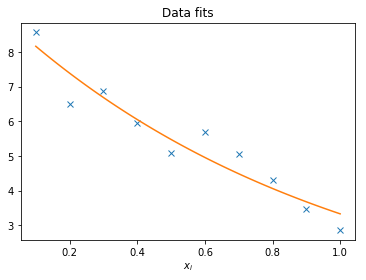

In [20]:
import numpy as np
import matplotlib.pyplot as plt
c1, c2 = 5.0, 4.0
i = np.r_[1:11]
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*np.exp(-xi)
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))
A = np.c_[np.exp(-xi)[:, np.newaxis], np.exp(xi)[:, np.newaxis]]
c, resid, rank, sigma = np.linalg.lstsq(A, zi) # solve using linalg.lsteq
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*np.exp(xi2)
plt.plot(xi,zi,'x',xi2,yi2)
#plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$')
plt.title('Data fits')
plt.show()

## First order Ordinary Differential Equations

Using numpy and the intergrate package from scipy one can easily solve ordinary differential equations with a variety of boundary or initial conditions. 

For example we solve here the equation: $\frac{dy}{dx}+y=x$ under the condition y(0)=1. The particular differential equation has an analytical solution $y=x-1+2e^{-x}$ which we overplot.

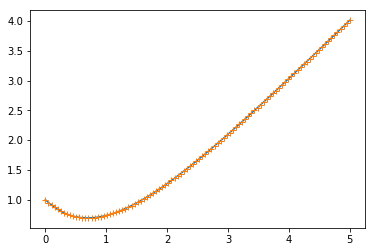

In [229]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define a function which calculates the derivative
def dy_dx(y, x):
    return x - y

xs = np.linspace(0,5,100)
y0 = 1.0
ys = odeint(dy_dx, y0, xs)
ys = np.array(ys).flatten()
y_exact = xs - 1 + 2*np.exp(-xs)
y_difference = ys - y_exact
plt.plot(xs, ys, xs, y_exact, "+");
plt.show()

## Second order Ordinary Differential Equations

Solve for y in $y″+2y′+2y=5cos(2x)$ if $y(0)=0$ and $y'(0)=0$
Setting z=y′ we can convert the second order into a system of two first order differential equations as: 
y′=z
z′=y″=-2z-2y+5cos(2x)
where y(0)=0 and z(0)=0


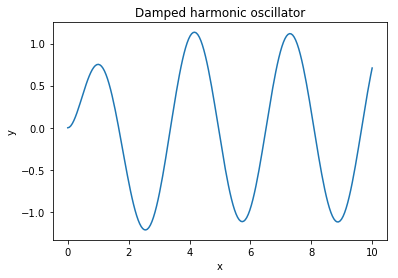

In [368]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def dU_dx(U, x):
    # Here U is a vector such that y=U[0] and z=U[1]. This function should return [y', z']
    return [U[1], -2*U[1] - 2.*U[0] + 5.*np.cos(2*x)]
U0 = [0, 0]
xs = np.linspace(0, 10, 200)
Us = odeint(dU_dx, U0, xs) # Same as before but instead of N scalars, the input is 2xN
ys = Us[:,0]
plt.plot(xs,ys)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Damped harmonic oscillator");
plt.show()


## Extracting Diagonals 


import numpy as np
x = np.arange(9).reshape((3,3))
print(x)
main_diagonal=np.diag(x)
print(main_diagonal)
single_positive_offset_diagonal=np.diag(x, k=1)
print(single_positive_offset_diagonal)
single_negative_offset_diagonal=np.diag(x, k=-1)
print(single_negative_offset_diagonal)


## Eigenvalues and Eigenvectors


An eigenvalue w of a matrix A has the property that there exists a vector (eigenvector) v for which: $\textbf{A}*\vec{v} = w*\vec{v} \Rightarrow (\textbf{A}-w*\textbf{I})\vec{v}=0$


Code from https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.eig.html

In [370]:
import numpy as np
from numpy import linalg as LA


A=np.array([[0, 1], [1, 0]])
print(A)
w, v = LA.eig(A)
print(w)
print(v)

for i in range(0, 2):
        print(np.dot(A[:,:], v[:,i])- w[i] * v[:,i])

[[0 1]
 [1 0]]
[ 1. -1.]
[[ 0.707107 -0.707107]
 [ 0.707107  0.707107]]
[ 0.  0.]
[ 0.  0.]


## Solving the Laplace Equation with numpy 

Using numpy we can solve the standard (2D) heat transfer equation $\nabla^{2} T = \frac{\partial^{2}{T}}{\partial{x}^{2}}+\frac{\partial^{2}{T}}{\partial{y}^{2}}= 0$ on a square grid with Dirichlet boundary conditions.

In [381]:
import numpy as np
import matplotlib.pyplot as plt

# Set maximum iteration
maxIter = 800

# Set Dimension and delta
lenX = lenY = 10 #we set it rectangular
delta = 1

# Boundary condition
Ttop = 100
Tbottom = 50
Tleft = 100
Tright = 100

# Initial guess of interior grid
Tguess = 20

# Set colour interpolation and colour map
colorinterpolation = 50
colourMap = plt.cm.coolwarm 

# Set meshgrid
X, Y = np.meshgrid(np.arange(0, lenX), np.arange(0, lenY))

# Set array size and set the interior value with Tguess
T = np.empty((lenX, lenY))
T.fill(Tguess)

# Set Boundary condition
T[(lenY-1):, :] = Ttop
T[:1, :] = Tbottom
T[:, (lenX-1):] = Tright
T[:, :1] = Tleft


Discetize: 
$T_{i,j} = \frac{1}{4}(T_{i+1,j}+T_{i-1,j}+T_{i,j+1}+T_{i,j-1})$

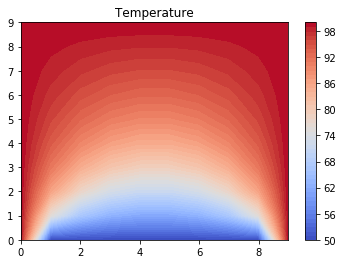

In [382]:
# Iterate 
for iteration in range(0, maxIter):
    for i in range(1, lenX-1, delta):
        for j in range(1, lenY-1, delta):
            T[i, j] = 0.25 * (T[i+1][j] + T[i-1][j] + T[i][j+1] + T[i][j-1])

# Configure the contour
plt.title("Temperature")
plt.contourf(X, Y, T, colorinterpolation, cmap=colourMap)

# Set Colorbar
plt.colorbar()

# Show the result in the plot window
plt.show()
